In [11]:
import numpy
import random
import matplotlib
# matplotlib.use('agg')   # 功能具体不明，暂时发现注释该行可以显示图片

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
def studentReg(ages_train, net_worths_train):
    '''
    简单线性回归模型
    '''
    reg = LinearRegression()
    reg.fit(ages_train, net_worths_train)
    
    return reg

In [13]:
def ageNetWorthData():
    '''
    年龄和财富净值虚拟数据生成
    '''
    random.seed(42)
    numpy.random.seed(42)
    
    ages = []
    for ii in range(100):
        ages.append( random.randint(20, 65))  # 将随机生成的20-65之间的整数添加到ages
    net_worths = [ ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
    
    ages = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
    
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)
    
    return ages_train, ages_test, net_worths_train, net_worths_test
    

In [14]:
ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

In [15]:
reg = studentReg(ages_train, net_worths_train)

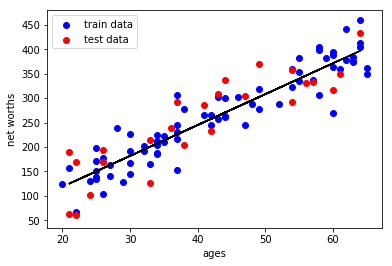

In [16]:
plt.clf()
plt.scatter(ages_train, net_worths_train, color='b', label='train data')
plt.scatter(ages_test, net_worths_test, color='r', label='test data')
plt.plot(ages_test, reg.predict(ages_test), color='black')
plt.legend(loc=2)
plt.xlabel('ages')
plt.ylabel('net worths')
plt.savefig('test.png')

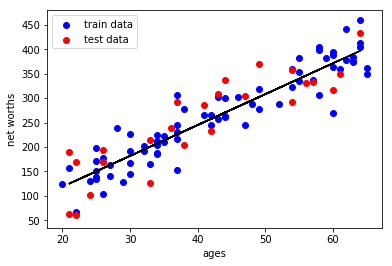

In [17]:
plt.figure()
plt.scatter(ages_train, net_worths_train, color='b', label='train data')
plt.scatter(ages_test, net_worths_test, color='r', label='test data')
plt.plot(ages_test, reg.predict(ages_test), color='black')
plt.legend(loc=2)
plt.xlabel('ages')
plt.ylabel('net worths')
plt.show()

In [18]:
print("Katie's net worth prediction:", reg.predict([[27]]))
print('slope:', reg.coef_)
print('intercept:', reg.intercept_)
print('stats on test dataset'.center(80, '*'))
print('r-squared score on test data:', reg.score(ages_test, net_worths_test))
print('stats on training data'.center(80, '*'))
print('r-squared score on training data:', reg.score(ages_train, net_worths_train))

Katie's net worth prediction: [[162.90800279]]
slope: [[6.30945055]]
intercept: [-7.44716216]
*****************************stats on test dataset******************************
r-squared score on test data: 0.7889037259170789
*****************************stats on training data*****************************
r-squared score on training data: 0.8773146084882211


在这个项目中，通过运算 决定系数$R^{2}$来量化模型的表现。
模型的决定系数是回归分析中十分常用的统计信息，经常被当做衡量模型预测能力好坏的标准。

$R^{2}$的数值范围从0至1，表示目标变量的预测值和实际值之间的相关程度平方的百分比。   
一个模型的$R^{2}$值为0还并不如直接用平均值来预测效果好；而一个$R^{2}$值为1的模型则可以对目标变量进行完美的预测。   
从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用特征来解释。  
模型也可能出现负值的$R^{2}$，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。  

在对数据进行线性回归计算之后，我们能够得到相应函数的系数，那么我们如何知道得出的这个系数对方程结果的影响有多强呢？

所以我们用到了一种方法叫做 Coefficient of Determination （决定系数）来判断**回归方程**拟合的程度。

**前提概念：**
1. Sum of Squared Due to Error  误差平方和   
    $SSE = \sum{(y_{i} - \hat{y}_{i})}$
   <br>第i个观察点，真实数据$y_{i}$与估计值$\hat{y}_{i}$之间的差被称为第i个residual(残差），SSE就是所有观察点的residual的和.</br>
   
   
2. Total Sum of Squares   总的平方和   
    $SST = \sum{(y_{i} - \bar{y})^{2}}$
        
        
3. Sum of Squares Due to Regression   回归平方和   
    $SSR = \sum{(\hat{y}_{i} - \bar{y})^{2}}$
    
    
通过以上我们能得到以下关于他们三者的关系：  
    $SST = SSR + SSE$


**决定系数：判断 回归方程 的拟合程度**  
通过回归方程得出的dependent variable(依赖变量）有numer% 能被independent variable所揭示。  
$R^{2}$决定系数（拟合优度）：  
$r^{2} = \frac{SSR}{SST}$    
$R^{2}(y,\hat{y}) = 1 - \frac{\sum(y_{i} -\hat{y}_{i})^{2}}{\sum(y_{i} -\bar{y}_{i})^{2}}$ 
<br>$R^{2}(y,\hat{y}) = 1 - \frac{SSE}{SST}$</br>

**相关系数Correlation Coefficient：测试dependent variable和independent variable他他们之间的线性关系有多强**。  
也就是说，independent variable产生变化时dependent variable的变化有多大。  
可以反应是正相关还是负相关。  

** Sample correlation coefficient **:  
    $r_{xy} $= (sign of  $b_{1})\sqrt{Coefficient Of Determination}$   
               =(sign of $b_{1}$)$\sqrt{r^{2}}$  
where $b_{1}$ = the slope of the estimated regression equation $\hat{y} = b_{0} + b_{1}x$